In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print('physical_devices-----',len(physical_devices))
#import os 
#os.environ['CUDA_VISIBLE_DEVICES']='0'

2024-06-10 04:35:11.204613: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 04:35:11.876369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Función para añadir más de una característica
def add_feature1(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    # Se concatena la secuncia de caracteres del conjunto de train con un matriz dispersa
    return hstack([X, csr_matrix(feature_to_add)], 'csr')

# Función para añadir una característica a la vez
def add_feature2(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    # Se concatena la secuncia de caracteres del conjunto de train con un matriz dispersa
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [3]:
train_stylometry=pd.read_csv('exp_train/stylometry_train_S1.csv')
test_stylometry=pd.read_csv('exp_test/stylometry_test_S1.csv')
#test_stylometry=pd.read_csv('Test/stylometry_test_S1.csv')
train_stylometry = train_stylometry.values 
test_stylometry=test_stylometry.values
print(train_stylometry)
print('Stylometry listo!')
    
    
#Dataset LLM Bert (Andric)
train_bert=pd.read_csv('exp_train/train_subtask1bert-base-multilingual-cased-finetuned-autext24.csv',header=None)
test_bert=pd.read_csv('exp_test/test_subtask1bert-base-multilingual-cased-finetuned-autext24.csv',header=None)
#test_bert=pd.read_csv('Test/test_subtask1bert-base-multilingual-cased-finetuned-autext24.csv',header=None)
train_bert=train_bert.values
test_bert=test_bert.values
print('LLM Bert listo!')
    
# Dataset LLM Multilingual_e5 (Andric)
train_e5=pd.read_csv('exp_train/train_subtask1multilingual-e5-large-finetuned-autext24.csv', header=None)
test_e5=pd.read_csv('exp_test/test_subtask1multilingual-e5-large-finetuned-autext24.csv',header=None)
#test_e5=pd.read_csv('Test/test_subtask1multilingual-e5-large-finetuned-autext24.csv',header=None)
train_e5=train_e5.values
test_e5=test_e5.values
print('LLM E5 listo!')

#Dataset roberta (Andric)
train_roberta=pd.read_csv('exp_train/train_subtask1xlm-roberta-base-finetuned-autext24.csv',header=None)
test_roberta=pd.read_csv('exp_test/test_subtask1xlm-roberta-base-finetuned-autext24.csv',header=None)        
#test_roberta=pd.read_csv('Test/test_subtask1xlm-roberta-base-finetuned-autext24.csv',header=None)
train_roberta=train_roberta.values
test_roberta=test_roberta.values
print('LLM Roberta listo!')

[[0.45905148 0.09679427 0.03873593 ... 0.         0.         0.0072165 ]
 [1.         0.05353423 0.01834862 ... 0.         0.         0.        ]
 [0.52192394 0.10034773 0.03669725 ... 0.01018251 0.         0.        ]
 ...
 [0.39141912 0.08603243 0.0347185  ... 0.00882927 0.         0.        ]
 [0.42076284 0.10144932 0.15672783 ... 0.         0.         0.        ]
 [0.41538658 0.08128784 0.02848869 ... 0.00925259 0.         0.        ]]
Stylometry listo!
LLM Bert listo!
LLM E5 listo!
LLM Roberta listo!


In [4]:
# Dataset original
train_data = pd.read_csv('exp_train/train_S1.csv')
test_data = pd.read_csv('exp_test/test_S1.csv')
#test_data = pd.read_json('Test/test_set_original.jsonl',lines=True)

train_data['label'] = np.where(train_data['label']=='generated',1,0)
test_data['label'] = np.where(test_data['label']=='generated',1,0)

X_train_data=train_data['text']
y_train_data=train_data['label']
    
X_test_data=test_data['text']
y_test_data=test_data['label']

print(train_data.shape)
print(test_data.shape)
print('Datos originales, listo!')
    

(76764, 3)
(32899, 3)
Datos originales, listo!


In [5]:
# Datos de entrenamiento
X_train_cv=add_feature1(train_stylometry,train_bert)
X_train_cv=add_feature1(X_train_cv,train_e5)
X_train_cv=add_feature1(X_train_cv,train_roberta)
# Calculamos más características adicionales 
num_digits= X_train_data.str.count('\d')
num_stops = X_train_data.str.count('\s')    
# Y las agregamos a nuestros datos 
X_train_cv = add_feature2(X_train_cv, num_digits)
X_train_cv = add_feature2(X_train_cv, num_stops)
print('Datos de entrenamiento listos!')

# Datos de prueba 
X_test_cv=add_feature1(test_stylometry,test_bert)
X_test_cv=add_feature1(X_test_cv,test_e5)
X_test_cv=add_feature1(X_test_cv,test_roberta)
# Calculamos más características adicionales
num_digits_test= X_test_data.str.count('\d')
num_stops_test = X_test_data.str.count('\s')
# Y las agregamos a nuestros datos
X_test_cv = add_feature2(X_test_cv, num_digits_test)
X_test_cv = add_feature2(X_test_cv, num_stops_test)
print('Datos de prueba listos!')
print('Termina procesamiento de datos')
print('*'*30)

Datos de entrenamiento listos!
Datos de prueba listos!
Termina procesamiento de datos
******************************


In [10]:
import tensorflow as tf
from keras.optimizers import Adam

# Modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_cv.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Optimizador
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compilamos el modelo
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       329,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,049 (1.29 MB)

 Trainable params: 338,049 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Comenzamos con el entrenamiento. Dejamos otro 20% para el conjunto de validación.
history = model.fit(X_train_cv, y_train_data, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.9505 - loss: 0.1880 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 47s 98ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9998 - val_loss: 7.1143e-04
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 47s 97ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9999 - val_loss: 6.0990e-04
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9999 - val_loss: 5.8300e-04
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 47s 98ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 6.4584e-04
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9999 - val_loss: 6.0238e-04
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.9997 - loss: 9.9385e-04 - val_accuracy: 0.9999 - val_loss: 6.6872e-04
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - ac

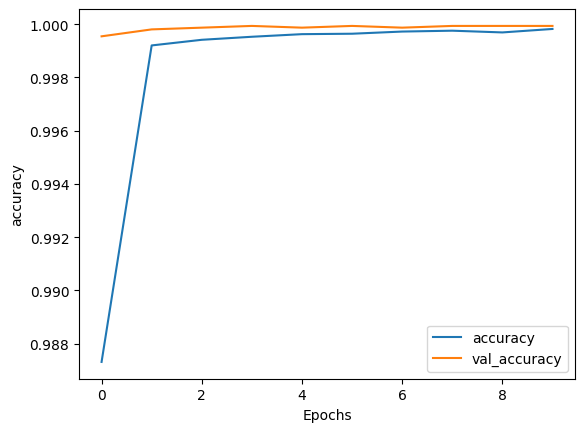

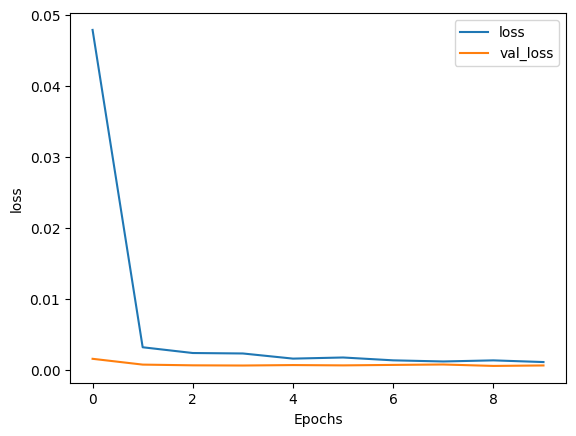

In [12]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test_cv, y_test_data)

print("Accuracy en los datos de prueba:", test_accuracy)

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9755 - loss: 0.2077
Accuracy en los datos de prueba: 0.9749536514282227


In [14]:
y_pred = model.predict(X_test_cv)

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step


In [17]:
from sklearn.metrics import f1_score
y_pred_labels = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test_data, y_pred_labels)

In [18]:
f1

0.9767861167455488